<a href="https://colab.research.google.com/github/urspravi/my_projects/blob/main/Convolutional_AutoEncoder_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
new_model = tf.keras.models.load_model('/content/model1.h5')

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 125, 125, 32)      1568      
                                                                 
 dropout (Dropout)           (None, 125, 125, 32)      0         
                                                                 
 batch_normalization (Batch  (None, 125, 125, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      32832     
                                                                 
 dropout_1 (Dropout)         (None, 122, 122, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 119, 119, 128)     131200    
                                                        

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download jessicali9530/celeba-dataset

100% 1.32G/1.33G [00:06<00:00, 262MB/s]
100% 1.33G/1.33G [00:06<00:00, 216MB/s]


In [ ]:
! unzip celeba-dataset.zip

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,InputLayer,Conv2DTranspose
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import optimizers
from keras import losses
from keras import models
import os
from PIL import Image

In [ ]:
df_partition = pd.read_csv('/content/list_eval_partition.csv')
img_dir = '/content/img_align_celeba/img_align_celeba/'
train_paths = [img_dir + i for i in df_partition[df_partition['partition'] == 0]['image_id']]
val_paths = [img_dir + i for i in df_partition[df_partition['partition'] == 1]['image_id']]
test_paths = [img_dir + i for i in df_partition[df_partition['partition'] == 2]['image_id']]
print(f'Train: {len(train_paths)}')
print(f'Val: {len(val_paths)}')
print(f'Test: {len(test_paths)}')

Train: 162770
Val: 19867
Test: 19962


In [ ]:
from PIL import Image

def load_image(path, gray=False):
    img = Image.open(path)
    img = img.resize((64,64))
    if gray:
        img = img.convert('L')
    return np.array(img)

def load_image2(path, gray=False):
    img = Image.open(path)
    img = img.resize((128,128))
    if gray:
        img = img.convert('L')
    return np.array(img).astype('float32')

def normalize(img):
    img = img / 255
    return img

def denormalize(img):
    img = img * 255
    return img

def show(img, gray=False):
    plt.axis('on')
    if gray:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)

In [ ]:
test_images2 = np.array([load_image2(path, gray=False)
                         for path in test_paths[:10]])
test_images2 = normalize(test_images2)
test_images2.shape


(10, 128, 128, 3)

In [ ]:
encoder=Sequential()
encoder.add(InputLayer(input_shape=(128,128,3)))
for layer in new_model.layers[:10]:
    encoder.add(layer)
encoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 125, 125, 32)      1568      
                                                                 
 dropout (Dropout)           (None, 125, 125, 32)      0         
                                                                 
 batch_normalization (Batch  (None, 125, 125, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      32832     
                                                                 
 dropout_1 (Dropout)         (None, 122, 122, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 119, 119, 128)     131200    
                                                      

In [ ]:
from keras.layers import Input
encoded_input = Input(shape=(3444736,))
deco=new_model.layers[10](encoded_input)
for layer in new_model.layers[11:]:
    deco=layer(deco)
decoder = Model(encoded_input, deco)
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 3444736)]         0         
                                                                 
 reshape (Reshape)           (None, 116, 116, 256)     0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 119, 119, 128)     524416    
 anspose)                                                        
                                                                 
 batch_normalization_1 (Bat  (None, 119, 119, 128)     512       
 chNormalization)                                                
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 122, 122, 64)      131136    
 Transpose)                                                      
                                                           

In [ ]:
encoded_imgs = encoder(test_images2).numpy()
decoded_imgs = decoder(encoded_imgs).numpy()

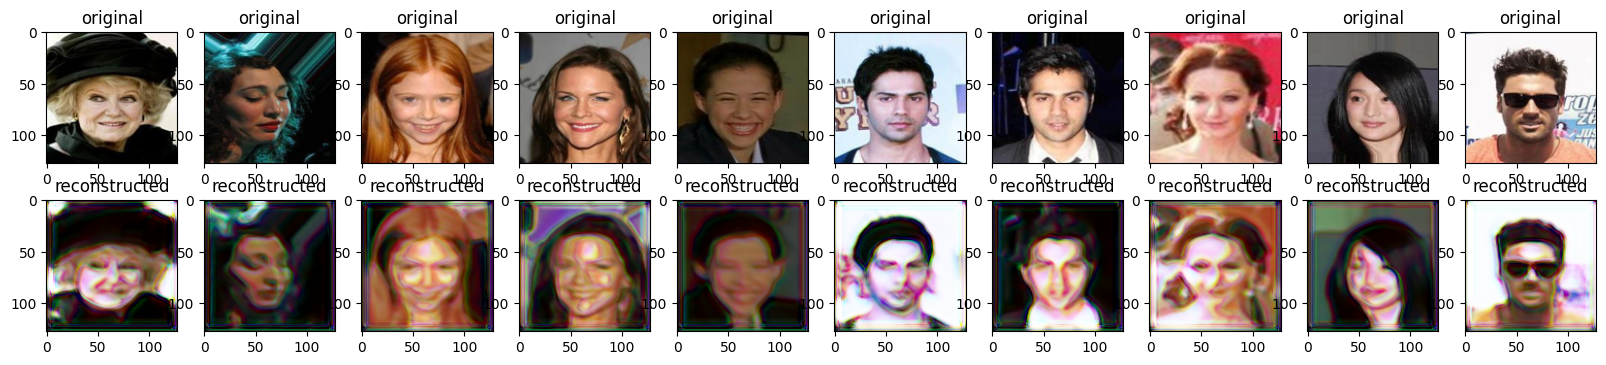

In [ ]:
import random
n = 10
rand = random.randint(0, len(test_images2) - n)

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(((test_images2[i + rand])*255).astype(np.int64))
    plt.title('original')
    plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)

    #Display resized
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(((decoded_imgs[i + rand])*255).astype(np.int64))
    plt.title('reconstructed')
    plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
plt.show()